# SVM으로 주가 등락 분류
기존에 사용했던 Neural Network를 사용한 주가 변동성 분류가 아닌 SVM을 사용하여서도 분류를 해보고 두 방법중 어느 것이 더 정확도가 높은지 비교해본다.  
SVM의 경우 각 기사에 따른 예측 결과가 확률이 아닌 예측 값으로 나오기 때문에, 각 날짜별 선택된 라벨을 실제 라벨값과 비교하는 것이 어렵다. 모델 학습 및 예측의 목적은 각 날짜의 결과값을 평균내는 것인데, SVM의 경우 그것을 고차원 좌표값으로 표현하여 항목을 나누는 것이므로 각 좌표값의 평균이 나타내는 점이 곧 예측의 평균값이 된다. 따라서 트레이닝과 테스트 데이터는 각 날짜의 기사를 모두 합친 데이터를 사용하였다.

training data = money_190101200531  
test data = maekyung_190101200531

In [1]:
# 사용할 데이터의 형태
data_type = '19'      # '1' : summarize X,개별 기사   '2' : summarize X,날짜별 기사
                    # '3' : summarize O,개별 기사   '4' : summarize O,날짜별 기사
normalized = 'done' # 'done' : 데이터 행별 normalize한 데이터     'not' : 데이터 행별 normalize 안한 데이터
erased_word = ''    # 제거된 단어 형태
num_word = '6000'   # 사용할 단어 수

In [2]:
# 생성된 training, test의 x,y값을 pickle의 형태로 저장
import pickle
import os
path = os.getcwd()+'/pickles/'
if erased_word != '':
    erased_word = '_'+erased_word
with open(path+data_type+'train_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train_x = pickle.load(f)
with open(path+data_type+'train_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train_y = pickle.load(f)
with open(path+data_type+'train2_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train2_x = pickle.load(f)
with open(path+data_type+'train2_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train2_y = pickle.load(f)
with open(path+data_type+'test_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test_x = pickle.load(f)
with open(path+data_type+'test_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test_y = pickle.load(f)
with open(path+data_type+'test2_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test2_x = pickle.load(f)
with open(path+data_type+'test2_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test2_y = pickle.load(f)

In [3]:
# numpy 사용하여 float로 바꾸어주는 과정
import numpy as np
x_train = np.asarray(train_x).astype('float32')
y_train = np.asarray(train_y).astype('float32')
x_test = np.asarray(test_x).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [4]:
from sklearn.svm import SVC
result = []
x = x_train
y=[]
x_axis = []
y_axis = []
for i in y_train:
    if i[0]==1 and i[1] ==0 and i[2] ==0:
        y.append(-1)
    elif i[0] ==0 and i[1] == 1 and i[2] == 0:
        y.append(0)
    else:
        y.append(1)
y = np.asarray(y)
for i in range(1,6):
    count = 0
    a = 20 * i
    b = 10 * i
    x_axis.append(a)
    y_axis.append(b)
    classifier = SVC(kernel = 'rbf',C = a ,gamma = b)
    classifier.fit(x,y)
    for i in range(len(x)):
        if classifier.predict([x[i]]) == y[i]:
            count = count + 1
    result.append(count/len(x))
    
result = np.asarray(result)

In [5]:
#test 정리
xx = x_test
yy=[]
for i in y_test:
    if i[0]==1 and i[1] ==0 and i[2] ==0:
        yy.append(-1)
    elif i[0] ==0 and i[1] == 1 and i[2] == 0:
        yy.append(0)
    else:
        yy.append(1)
        


In [6]:
print(x_axis)
print(y_axis)
print(result)

[20, 40, 60, 80, 100]
[10, 20, 30, 40, 50]
[0.65555556 0.88333333 0.96111111 0.99166667 1.        ]


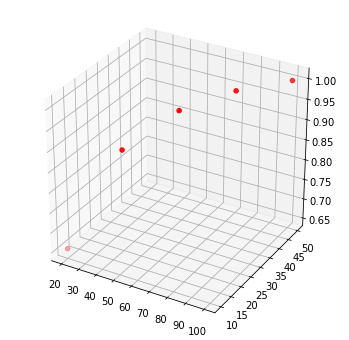

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

x_axis = np.asarray(x_axis)
y_axis = np.asarray(y_axis)

xmin, xmax, ymin, ymax, zmin, zmax = 0, 100, 0, 50, 0, 1.0
plt.rcParams["figure.figsize"] = (6, 6)

fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x_axis,y_axis,result,color='r',marker='o')

plt.show()

# 중간점검
c = 60 gamma = 30부터 트레이닝 정확도가 약 96%정도가 나왔으므로 c 60, 80, 100을 대상으로 gamma를 해당 c까지 올리면서 확인해보고자 한다.

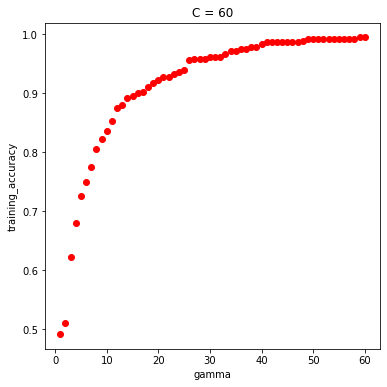

In [8]:
# C = 60 training_accuracy
result_c60 = []
x_axis_c60 = []
for i in range(1,61):
    x_axis_c60.append(i)
    classifier = SVC(kernel = 'rbf',C = 60 ,gamma = i)
    classifier.fit(x,y)
    count = 0
    for i in range(len(x)):
        if classifier.predict([x[i]]) == y[i]:
            count = count + 1
    result_c60.append(count/len(x))

x_axis_c60 = np.asarray(x_axis_c60)
y_axis_c60 = np.asarray(result_c60)
plt.title('C = 60')
plt.xlabel('gamma')
plt.ylabel('training_accuracy')
plt.scatter(x_axis_c60,y_axis_c60,color='r',marker='o')

In [9]:
print(y_axis_c60)
print(len(y_axis_c60))

[0.49166667 0.51111111 0.62222222 0.68055556 0.725      0.75
 0.775      0.80555556 0.82222222 0.83611111 0.85277778 0.875
 0.88055556 0.89166667 0.89444444 0.9        0.90277778 0.91111111
 0.91666667 0.92222222 0.92777778 0.92777778 0.93333333 0.93611111
 0.93888889 0.95555556 0.95833333 0.95833333 0.95833333 0.96111111
 0.96111111 0.96111111 0.96666667 0.97222222 0.97222222 0.975
 0.975      0.97777778 0.97777778 0.98333333 0.98611111 0.98611111
 0.98611111 0.98611111 0.98611111 0.98611111 0.98611111 0.98888889
 0.99166667 0.99166667 0.99166667 0.99166667 0.99166667 0.99166667
 0.99166667 0.99166667 0.99166667 0.99166667 0.99444444 0.99444444]
60


In [10]:
x_axis_c60_test = []
y_axis_c60_test = []
for num in range(31,120):
    x_axis_c60_test.append(num)
    classifier = SVC(kernel = 'rbf',C = 60 ,gamma = num)
    classifier.fit(x,y)
    count = 0
    for i in range(len(xx)):
        if classifier.predict([xx[i]]) == yy[i]:
            count = count + 1
    y_axis_c60_test.append(count/len(xx))

x_axis_c60_test = np.asarray(x_axis_c60_test)
y_axis_c60_test = np.asarray(y_axis_c60_test)
print(y_axis_c60_test)
print(len(y_axis_c60_test))

[0.55331412 0.55331412 0.55043228 0.54755043 0.54466859 0.54466859
 0.55043228 0.54755043 0.54755043 0.54755043 0.55331412 0.55043228
 0.54755043 0.55331412 0.55043228 0.55619597 0.55907781 0.55907781
 0.55619597 0.55619597 0.55619597 0.55907781 0.55907781 0.55619597
 0.55619597 0.55331412 0.55331412 0.55619597 0.55619597 0.55619597
 0.55907781 0.55907781 0.55619597 0.55331412 0.55331412 0.55043228
 0.55619597 0.55619597 0.55907781 0.55907781 0.55907781 0.56195965
 0.56195965 0.56195965 0.5648415  0.56195965 0.57060519 0.57060519
 0.57060519 0.57060519 0.57060519 0.57060519 0.57060519 0.57060519
 0.57060519 0.56772334 0.57060519 0.57060519 0.57060519 0.57060519
 0.57060519 0.57060519 0.56772334 0.56772334 0.57060519 0.57060519
 0.57060519 0.57348703 0.57636888 0.57636888 0.57348703 0.57348703
 0.57348703 0.57348703 0.57348703 0.57060519 0.56772334 0.56772334
 0.56772334 0.56772334 0.56772334 0.57060519 0.57060519 0.56772334
 0.56772334 0.56772334 0.56772334 0.56772334 0.57060519]
89


# C = 60 결론
약 57.3%의 정확도에서 더이상 오르지 않는 모습을 보여주고 있다.

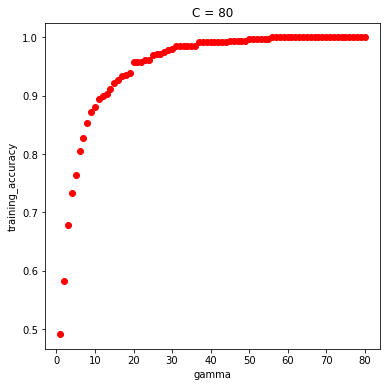

In [11]:
#c = 80 training_accuracy
result_c80 = []
x_axis_c80 = []
for i in range(1,81):
    x_axis_c80.append(i)
    classifier = SVC(kernel = 'rbf',C = 80 ,gamma = i)
    classifier.fit(x,y)
    count = 0
    for i in range(len(x)):
        if classifier.predict([x[i]]) == y[i]:
            count = count + 1
    result_c80.append(count/len(x))

x_axis_c80 = np.asarray(x_axis_c80)
y_axis_c80 = np.asarray(result_c80)
plt.title('C = 80')
plt.xlabel('gamma')
plt.ylabel('training_accuracy')
plt.scatter(x_axis_c80,y_axis_c80,color='r',marker='o')

In [12]:
print(y_axis_c80)

[0.49166667 0.58333333 0.67777778 0.73333333 0.76388889 0.80555556
 0.82777778 0.85277778 0.87222222 0.88055556 0.89444444 0.9
 0.90277778 0.91111111 0.92222222 0.92777778 0.93333333 0.93611111
 0.93888889 0.95833333 0.95833333 0.95833333 0.96111111 0.96111111
 0.96944444 0.97222222 0.97222222 0.975      0.97777778 0.98055556
 0.98611111 0.98611111 0.98611111 0.98611111 0.98611111 0.98611111
 0.99166667 0.99166667 0.99166667 0.99166667 0.99166667 0.99166667
 0.99166667 0.99166667 0.99444444 0.99444444 0.99444444 0.99444444
 0.99444444 0.99722222 0.99722222 0.99722222 0.99722222 0.99722222
 0.99722222 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


In [13]:
#c = 80 test_accuracy
x_axis_c80_test = []
y_axis_c80_test = []
for num in range(31,120):
    x_axis_c80_test.append(num)
    classifier = SVC(kernel = 'rbf',C = 80 ,gamma = num)
    classifier.fit(x,y)
    count = 0
    for i in range(len(xx)):
        if classifier.predict([xx[i]]) == yy[i]:
            count = count + 1
    y_axis_c80_test.append(count/len(xx))

x_axis_c80_test = np.asarray(x_axis_c80_test)
y_axis_c80_test = np.asarray(y_axis_c80_test)
print(y_axis_c80_test)
print(len(y_axis_c80_test))

[0.55043228 0.55043228 0.55043228 0.55043228 0.55331412 0.55619597
 0.55619597 0.55619597 0.55907781 0.55331412 0.55331412 0.55619597
 0.55619597 0.55331412 0.55331412 0.55619597 0.55619597 0.55907781
 0.55619597 0.55619597 0.55331412 0.55331412 0.55619597 0.55907781
 0.56195965 0.56195965 0.5648415  0.5648415  0.5648415  0.5648415
 0.5648415  0.56195965 0.5648415  0.56772334 0.56772334 0.57060519
 0.57060519 0.56772334 0.56772334 0.56772334 0.57060519 0.57060519
 0.57060519 0.57060519 0.57060519 0.57060519 0.57060519 0.57348703
 0.57348703 0.57348703 0.57348703 0.57060519 0.57060519 0.57060519
 0.57060519 0.57060519 0.57060519 0.57060519 0.57060519 0.57060519
 0.57060519 0.57060519 0.57060519 0.57060519 0.57348703 0.57348703
 0.57348703 0.57060519 0.57060519 0.57060519 0.56772334 0.56772334
 0.56772334 0.56772334 0.56772334 0.56772334 0.56772334 0.56772334
 0.56772334 0.56772334 0.56772334 0.56772334 0.56772334 0.5648415
 0.5648415  0.56772334 0.56772334 0.56772334 0.56772334]
89


# C = 80 결론
test_accuracy가 57.3%정도에서 더 증가하지 않고 있다.

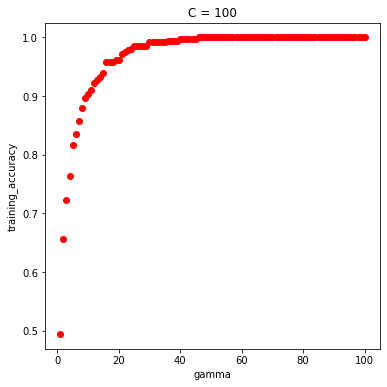

In [14]:
#c = 100 training_accuracy
result_c100 = []
x_axis_c100 = []
for i in range(1,101):
    x_axis_c100.append(i)
    classifier = SVC(kernel = 'rbf',C = 100 ,gamma = i)
    classifier.fit(x,y)
    count = 0
    for i in range(len(x)):
        if classifier.predict([x[i]]) == y[i]:
            count = count + 1
    result_c100.append(count/len(x))

x_axis_c100 = np.asarray(x_axis_c100)
y_axis_c100 = np.asarray(result_c100)
plt.title('C = 100')
plt.xlabel('gamma')
plt.ylabel('training_accuracy')
plt.scatter(x_axis_c100,y_axis_c100,color='r',marker='o')

In [15]:
print(y_axis_c100)

[0.49444444 0.65555556 0.72222222 0.76388889 0.81666667 0.83611111
 0.85833333 0.88055556 0.89722222 0.90277778 0.91111111 0.92222222
 0.92777778 0.93333333 0.93888889 0.95833333 0.95833333 0.95833333
 0.96111111 0.96111111 0.97222222 0.975      0.97777778 0.98055556
 0.98611111 0.98611111 0.98611111 0.98611111 0.98611111 0.99166667
 0.99166667 0.99166667 0.99166667 0.99166667 0.99166667 0.99444444
 0.99444444 0.99444444 0.99444444 0.99722222 0.99722222 0.99722222
 0.99722222 0.99722222 0.99722222 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.


In [16]:
#c = 100 test_accuracy
x_axis_c100_test = []
y_axis_c100_test = []
for num in range(18,120):
    x_axis_c100_test.append(num)
    classifier = SVC(kernel = 'rbf',C = 100 ,gamma = num)
    classifier.fit(x,y)
    count = 0
    for i in range(len(xx)):
        if classifier.predict([xx[i]]) == yy[i]:
            count = count + 1
    y_axis_c100_test.append(count/len(xx))

x_axis_c100_test = np.asarray(x_axis_c100_test)
y_axis_c100_test = np.asarray(y_axis_c100_test)
print(y_axis_c100_test)
print(len(y_axis_c100_test))

[0.55331412 0.55331412 0.55331412 0.55331412 0.54755043 0.55331412
 0.54755043 0.55043228 0.55043228 0.55619597 0.55331412 0.55619597
 0.55619597 0.55043228 0.55331412 0.55331412 0.55331412 0.55619597
 0.55331412 0.55331412 0.55619597 0.55907781 0.55619597 0.55331412
 0.55331412 0.55907781 0.56195965 0.56195965 0.56195965 0.5648415
 0.5648415  0.5648415  0.56195965 0.55907781 0.55907781 0.55907781
 0.55907781 0.56195965 0.56195965 0.56195965 0.5648415  0.5648415
 0.5648415  0.56772334 0.56772334 0.57348703 0.57348703 0.57636888
 0.57636888 0.57636888 0.57060519 0.57348703 0.57636888 0.57636888
 0.57636888 0.57636888 0.57636888 0.57636888 0.57636888 0.57636888
 0.57636888 0.57636888 0.57636888 0.57348703 0.57348703 0.57348703
 0.57348703 0.57060519 0.57060519 0.57060519 0.57060519 0.57060519
 0.57060519 0.57060519 0.57060519 0.57060519 0.57060519 0.57348703
 0.57348703 0.57348703 0.57060519 0.57060519 0.57060519 0.56772334
 0.56772334 0.56772334 0.56772334 0.56772334 0.56772334 0.567723

# C = 100 결론
test_accuracy가 약 57.3%에서 더 증가하지 않고 있다.

# 최종 결론 및 DNN 방식과 비교
training data를 rbf방식으로 나타내었을 때 보이는 6000차원의 산점도를 분류할때 일정 오차를 허용하고 경계를 직선에 가깝게 하던 유선형으로 하던 간에 기하적으로 분류될 수 있는 양상에는 한계가 있고 이 때 가장 높은 test_accuracy는 약 57.3%로 측정이 되었고 이는 DNN방식으로 진행한 예측 약 80%보다 현저하게 낮은 정확도를 보였다.